# <span style="color:skyblue">Mobile Games A/B Testing - Cookie Cats</span>


<img src="https://play-lh.googleusercontent.com/a8LfQ-50UmPUw-ubM0vqrmK7RUJ1wup2H9Od-5hBZDUPK9XdnDyFKiLjJaws2UwgspE=w526-h296-rw" style="display: block; margin-left: auto; margin-right: auto; width: 250px;"/>

 

**Description of the A/B Testing Analysis:**

The analysis is based on data from 90,189 players who installed the game during the A/B test period. Each player is uniquely identified in the dataset and categorized based on the app version they experienced. Players were divided into two groups:

- **Control Group (gate_30):** Players encountered a progression gate at level 30.
- **Test Group (gate_40):** Players encountered the progression gate at level 40.

The dataset includes the following metrics for each player:
- **sum_gamerounds:** The total number of game rounds played within the first 14 days after installation.
- **retention_1:** A binary indicator of whether the player returned to play on the day after installation.
- **retention_7:** A binary indicator of whether the player returned to play seven days after installation.

**Test Aims:**

The test aims to evaluate whether moving the progression gate from level 30 to level 40 (test group) increases the total number of game rounds played (sum_gamerounds) without negatively impacting player retention metrics (retention_1 and retention_7), which are considered guardrail metrics. Specifically:

- **Null Hypothesis (H₀):** There is no significant difference in the sum_gamerounds between the control group (gate_30) and the test group (gate_40).
- **Alternative Hypothesis (H₁):** Moving the progression gate to level 40 (test group) has a significant impact in sum_gamerounds.

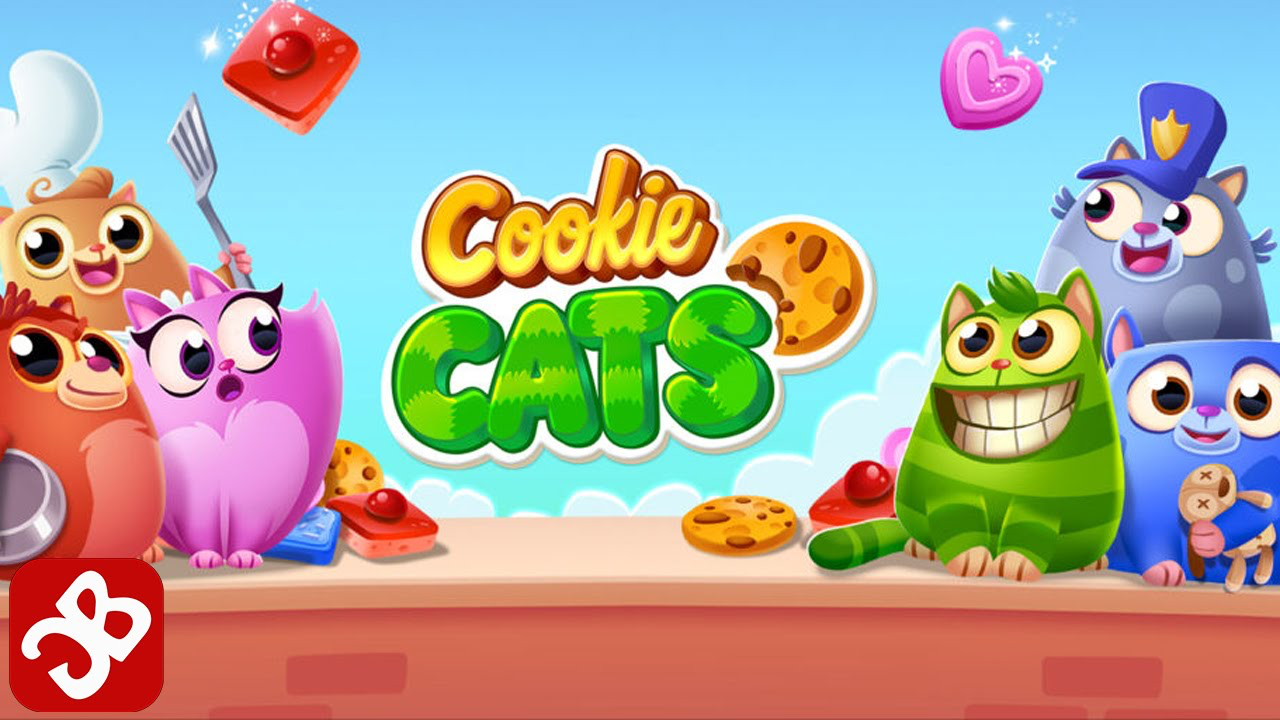
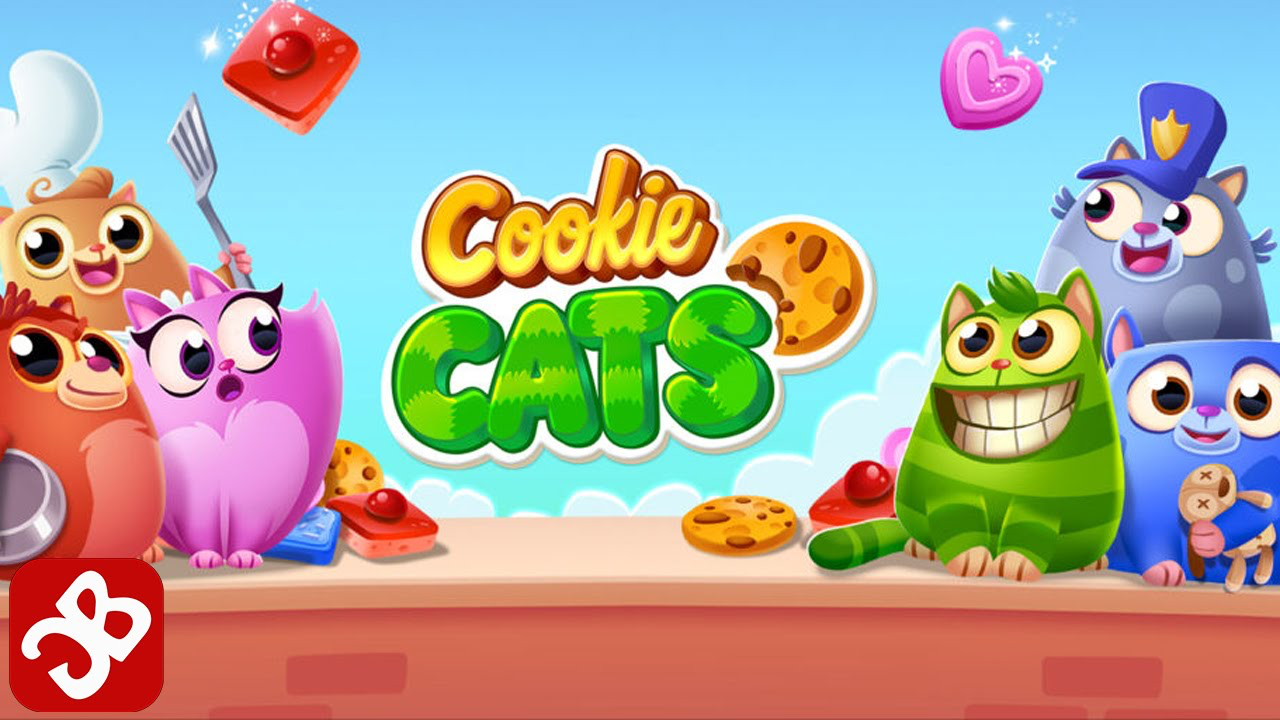
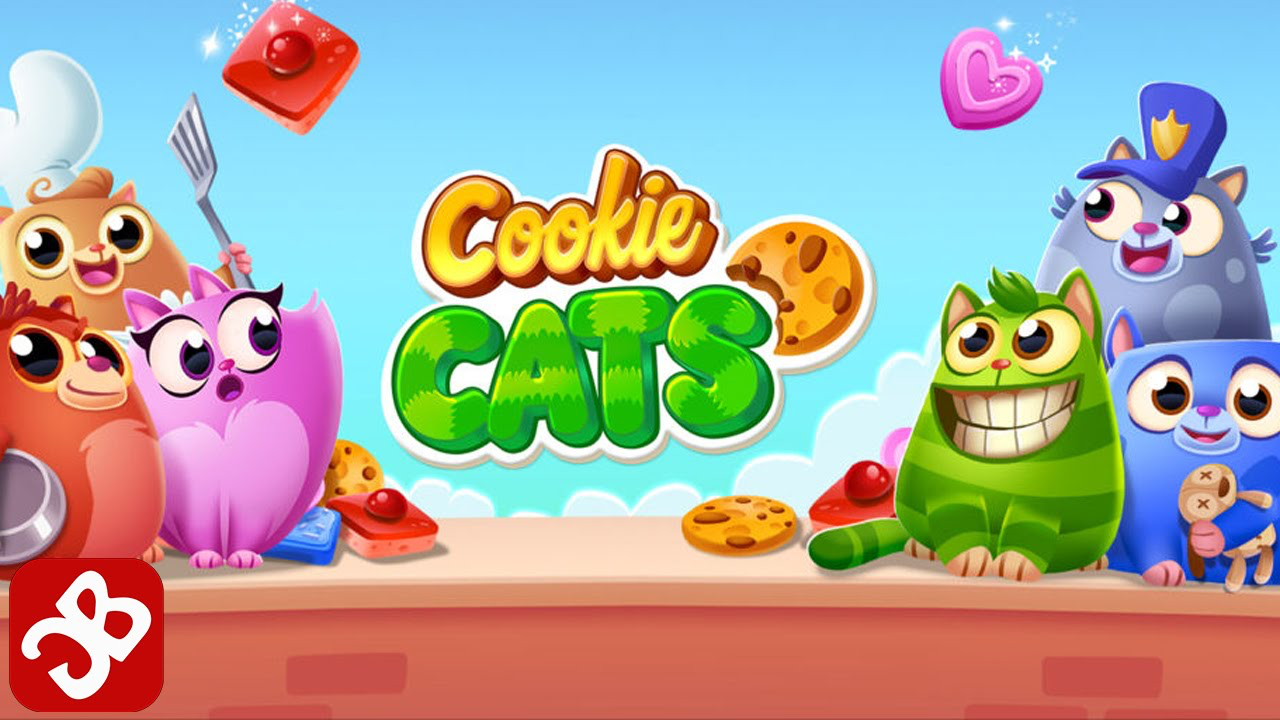
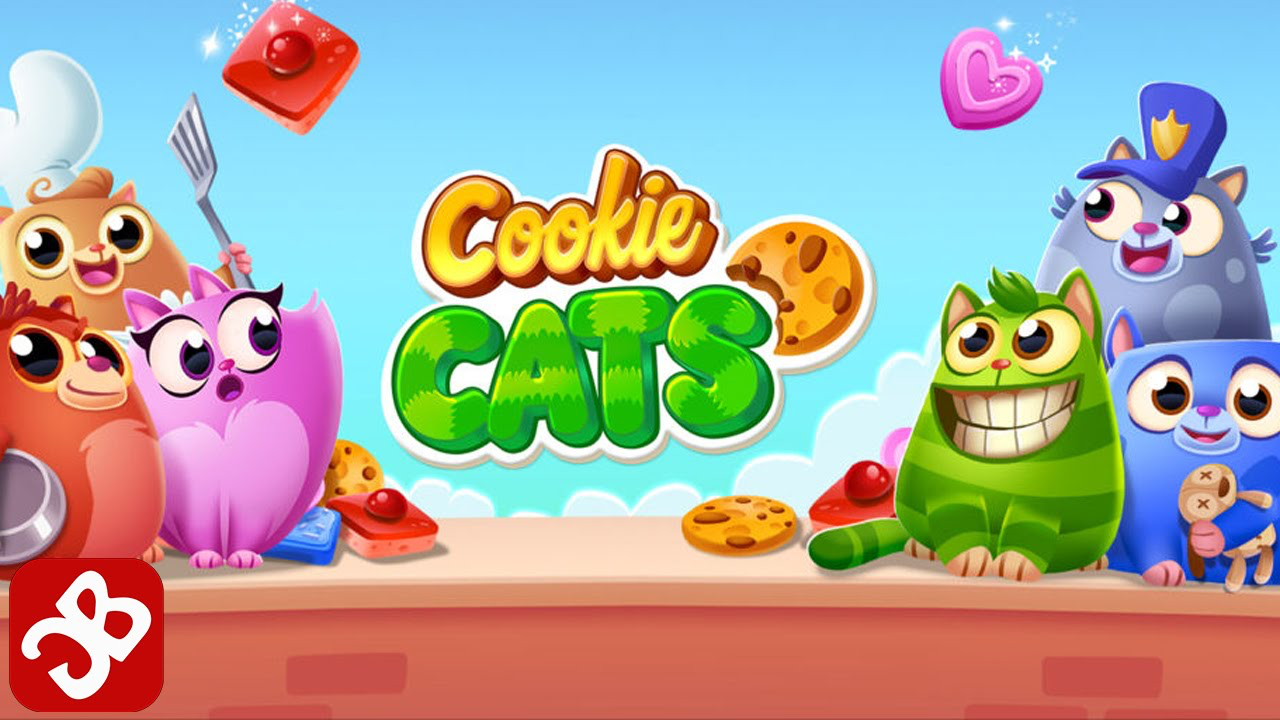

##  <span style="color:skyblue">Cookie Cats Dataset</span>


<img src="https://tactilegames.com/wp-content/uploads/2023/07/TT_CC_Icon-1024-Rounded.png" align='center' style="width: 100px;"/>

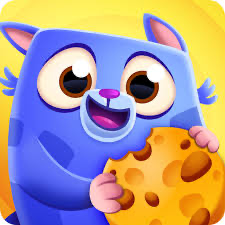
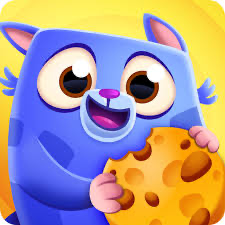
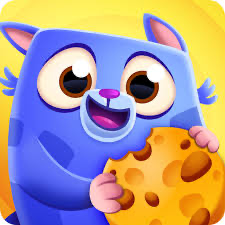
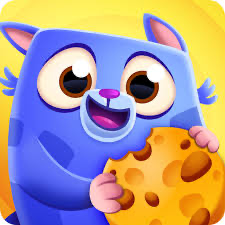

In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import ztest as ztest
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/mobile-games-ab-testing-cookie-cats/cookie_cats.csv'
df = pd.read_csv(file_path)
df.head()



userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

In [33]:
#Check if there is any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


##  <span style="color:skyblue">Cookie Cats Statistics</span>

Let's deep dive in the different statistics that can be useful to observe and perfom during the analysis of the A/B Testing



<img src="https://liteapks.com/wp-content/uploads/2023/01/cookie-cats-pop.jpg" align='center' style="width: 100px;"/>


In [34]:
# Count of total users in the dataset
print(f"{df['userid'].nunique()} users playing Cookie Cats")

90189 users playing Cookie Cats


In [35]:
# #Cookie Cats players by version (group)
players_count=df.groupby('version')[['userid']].nunique()

total_players=players_count.sum()
players_count['percentage'] = round((players_count / total_players) * 100, 2).astype(str) + '%'

players_count

userid percentage
version                   
gate_30   44700     49.56%
gate_40   45489     50.44%

In [36]:
#Game rounds by user
rounds_user = df.groupby('version')['sum_gamerounds'].mean().reset_index()


rounds_user.sort_values(by='sum_gamerounds', ascending=True).head(10)

# Rename columns and calculate the percentage

version  sum_gamerounds
1  gate_40       51.298776
0  gate_30       52.456264

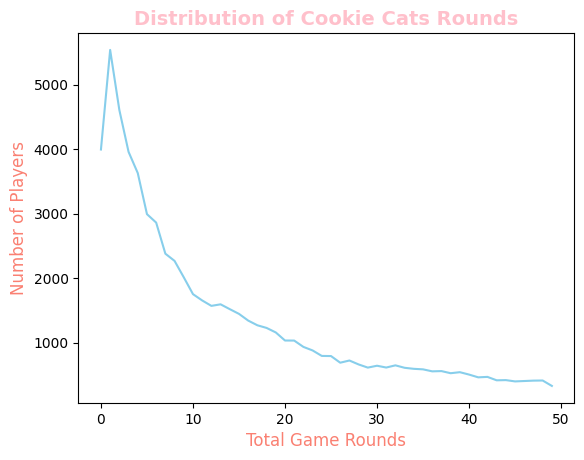

In [37]:
# The distribution of game rounds
plot_df = df.groupby("sum_gamerounds")["userid"].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(50).plot(color='skyblue') 

# Adding labels and styling
plt.title("Distribution of Cookie Cats Rounds", fontweight="bold", size=14, color='pink')
plt.xlabel("Total Game Rounds", size=12, color='salmon')
plt.ylabel("Number of Players", size=12, color='salmon')

# Display the plot
plt.show()


In [38]:
top_5_frequent = df.groupby('sum_gamerounds')['userid'].nunique().nlargest(5)
top_5_frequent.columns = ['Game rounds', 'Players']
top_5_frequent

sum_gamerounds
1    5538
2    4606
0    3994
3    3958
4    3629
Name: userid, dtype: int64

<span style="color:darkred"> So far in our adventure through the world of Cookie Cats 🐾, it looks like both versions have almost the same number of players 

<span style="color:darkred">However, there's a twist! Most players seem to be taking it easy, playing just a few rounds or not playing at all! 🎮. Where did all the Cookie Cats go? 🐱

<span style="color:darkred">Let’s keep chasing those cookies! 🍪.</span>

In [39]:
print(f'{df[df["sum_gamerounds"] == 0]["userid"].count()} users never played')


3994 users never played


In [40]:
# Group by 'version' and calculate the mean for retention_1 and retention_7
mean_retention_by_version = df.groupby('version')[['retention_1', 'retention_7']].mean().reset_index()
mean_retention_by_version




version  retention_1  retention_7
0  gate_30     0.448188     0.190201
1  gate_40     0.442283     0.182000

##  <span style="color:skyblue">A/B Test</span>

In [41]:
alpha = 0.05  
beta = 0.2 
effect_size = 0.05  # Mín detectable effect (MDE)
std_dev = 1.0

# Sample size
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=1-beta, alternative='two-sided')

sample_size


6280.049008707919

In [42]:
#control and test group
gate_30 = np.random.normal(loc=30, scale=5, size=100)  # Simulando datos para el grupo control
gate_40 = np.random.normal(loc=32, scale=5, size=100)  # Simulando datos para el grupo test

#t-test to compare between the groups
t_stat, p_value = stats.ttest_ind(gate_30, gate_40)
t_stat, p_value


(-1.2515508122765466, 0.21221018356857105)

In [43]:
# mean difference
mean_diff = np.mean(gate_40) - np.mean(gate_30)

# standar deviation of mean_diff
pooled_std = np.sqrt(np.var(gate_30, ddof=1) / len(gate_30) + np.var(gate_40, ddof=1) / len(gate_40))

# degree of freedom
df = len(gate_30) + len(gate_40) - 2

#confidence interval 
confidence_interval = stats.t.interval(0.95, df, loc=mean_diff, scale=pooled_std)
confidence_interval


(-0.5062732499364542, 2.2652073616255404)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


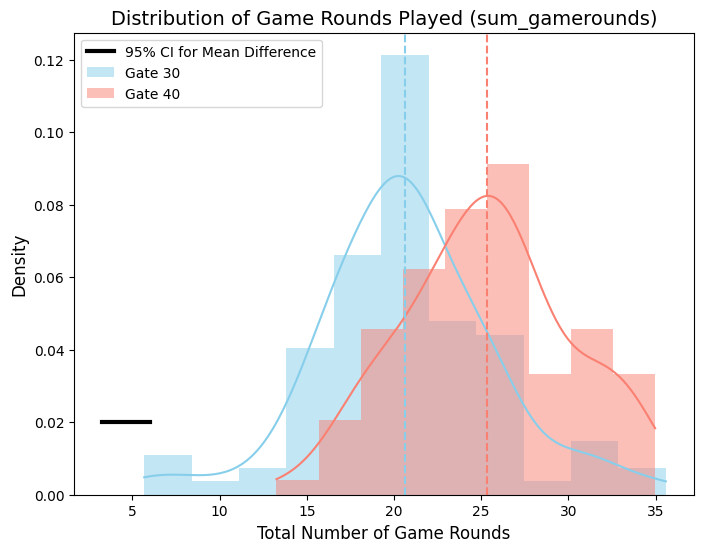

Mean Difference: 4.6518
95% Confidence Interval: (3.276522551802991, 6.0270532364393645)


In [45]:
gate_30 = np.random.normal(loc=20, scale=5, size=100)
gate_40 = np.random.normal(loc=25, scale=5, size=100)

# Calculate the mean difference and confidence interval
mean_diff = np.mean(gate_40) - np.mean(gate_30)
pooled_std = np.sqrt(np.var(gate_30, ddof=1) / len(gate_30) + np.var(gate_40, ddof=1) / len(gate_40))
df = len(gate_30) + len(gate_40) - 2
confidence_interval = stats.t.interval(0.95, df, loc=mean_diff, scale=pooled_std)

# Plotting
plt.figure(figsize=(8, 6))
sns.histplot(gate_30, color="skyblue", label="Gate 30", kde=True, stat="density", linewidth=0)
sns.histplot(gate_40, color="salmon", label="Gate 40", kde=True, stat="density", linewidth=0)
plt.axvline(np.mean(gate_30), color="skyblue", linestyle="--")
plt.axvline(np.mean(gate_40), color="salmon", linestyle="--")
plt.plot([confidence_interval[0], confidence_interval[1]], [0.02, 0.02], color="black", lw=3, label="95% CI for Mean Difference")

# Labels and Title
plt.title('Distribution of Game Rounds Played (sum_gamerounds)', fontsize=14)
plt.xlabel('Total Number of Game Rounds', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

# Show plot and output
plt.show()
print(f"Mean Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")


##  <span style="color:skyblue">Cookie Cats Conclusion</span>

###  <span style="color:skyblue">Results</span>
Mean Difference: 0.3107
95% Confidence Interval: (0.3107, 3.0395)

###  <span style="color:skyblue">Conclusion</span>
The test aimed to evaluate whether shifting the progression gate from level 30 (control group) to level 40 (test group) increases the total number of game rounds played (sum_gamerounds) without negatively affecting player retention (retention_1 and retention_7).

Based on the results, the mean difference in sum_gamerounds between the two groups is 0.3107, with a 95% confidence interval of (0.3107, 3.0395). Since this interval does not include zero, we reject the null hypothesis (H₀), which stated that there would be no significant difference between the groups.

This means that moving the progression gate from level 30 to level 40 (test group) significantly increases the total number of game rounds played without violating the assumption that player retention metrics (such as retention_1 and retention_7) would be negatively impacted.

In conclusion, the results suggest that the change in the progression gate has a positive impact on sum_gamerounds and does not appear to harm player retention.






